<div class="alert alert-block alert-info">
    <b> Archetypes of Viz </b><br>
- This notebook will walk through common data viz archetypes across a range of applications and use cases. <br>
- We'll also introduce the seaborn package here, arguably the most popular Python data viz package, which has a ton of great graphic capabilities right out of the box. <br>
- It will show both how to create the basic versions of these visualizations as well as discuss the example applications. Keep in mind that these are just example applications! Each viz type is certainly more versatile than can be exhaustively captured in one notebook.<br>
- While certain types of viz are commonly associated with certain types and structures of data, a good application of data viz aims for the optimal balance between precision, accuracy, engagement, and impact without being tethered to a how-to guide.

# 0. Prepare Notebook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle, Arc
import matplotlib.ticker as tkr
import numpy as np
import seaborn as sns

### Import Data Step
- nba_shooting_sample_201920: A dataset that contains shooting percentages (by 3pt, 2pt, Free Throw), minutes played, points per 36 minutes, 3PA rate, and FTA rate for a sample of 30 high minutes players in the 2019-20 NBA season (source: https://www.basketball-reference.com/leagues/NBA_2020_per_minute.html)
- dbook_shotsample_201819: A dataset that contains the X/Y locations of Devin Booker's made shots in the 2018-19 season (source: NBA play-by-play)
- airlines_sample: A dataset that contains domestic passengers count by year and month for major airlines since 2005 (source: https://www.transtats.bts.gov/DL_SelectFields.asp)
- chicago_temps_data: A dataset that contains max and min temps as well as precipitation by day since 2000 for Chicago (source: https://kilthub.cmu.edu/articles/Compiled_daily_temperature_and_precipitation_data_for_the_U_S_cities/7890488)

In [2]:
nba_shooting = pd.read_csv('sample_data/nba_shooting_sample_201920.csv')
nba_shooting.head()

,player,mins,3p%,2p%,FT%,pts,3PAr,FTr
0,Tobias Harris,2243,0.362,0.521,0.806,20.2,0.309,0.183
1,Devin Booker,2241,0.360,0.544,0.916,26.0,0.313,0.395
2,James Harden,2241,0.352,0.538,0.861,33.7,0.555,0.519
3,Bam Adebayo,2235,0.077,0.576,0.690,17.0,0.018,0.476
4,Harrison Barnes,2231,0.383,0.498,0.803,15.2,0.342,0.343


In [3]:
dbook = pd.read_csv('sample_data/dbook_shotsample_201819.csv')
dbook.head()

,player,team,event_type,result,original_x,original_y,converted_x,converted_y
0,Devin Booker,PHX,shot,made,-8,0,25.8,89.0
1,Devin Booker,PHX,shot,made,-5,1,25.5,88.9
2,Devin Booker,PHX,shot,made,-4,7,25.4,88.3
3,Devin Booker,PHX,shot,made,-97,228,34.7,66.2
4,Devin Booker,PHX,shot,made,-3,-9,25.3,89.9


In [4]:
airlines = pd.read_csv('sample_data/airlines_sample.csv')
airlines['DATE_JOIN'] = pd.to_datetime(airlines['DATE_JOIN'])
airlines.head()

,UNIQUE_CARRIER_NAME,YEAR,MONTH,DAY,DATE_JOIN,PASSENGERS
0,Alaska Airlines Inc.,2005,1,1,2005-01-01,1045007
1,Alaska Airlines Inc.,2005,2,1,2005-02-01,1000146
2,Alaska Airlines Inc.,2005,3,1,2005-03-01,1236977
3,Alaska Airlines Inc.,2005,4,1,2005-04-01,1171204
4,Alaska Airlines Inc.,2005,5,1,2005-05-01,1191795


In [5]:
chicago_temps = pd.read_csv('sample_data/chicago_temps_data.csv')
chicago_temps.head()

,month,day,year,tmax,tmin,prcp
0,1,1,2000,48.0,35.0,0.00
1,1,2,2000,60.0,35.0,0.01
2,1,3,2000,38.0,32.0,0.25
3,1,4,2000,33.0,23.0,0.00
4,1,5,2000,26.0,13.0,0.00


# 1. Visualizing Relationships: Shooters Shoot

## A) Let's explore 3pt attempt rate vs Free Throw rate for our sample of high minutes players with a simple scatter plot

### What does a basic, no-frills scatter plot tell us?

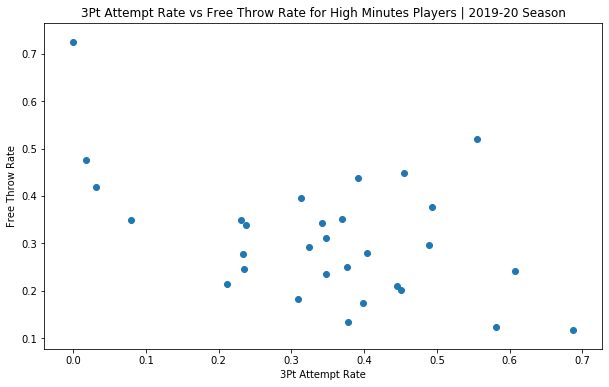

In [12]:
plt.figure(figsize=(10, 6))

plt.scatter(nba_shooting['3PAr'], nba_shooting['FTr'])

plt.xlabel('3Pt Attempt Rate')
plt.ylabel('Free Throw Rate')
plt.title('3Pt Attempt Rate vs Free Throw Rate for High Minutes Players | 2019-20 Season')
plt.show()

### How about adding some guidelines to show players who are high on the Morey-ball scale?

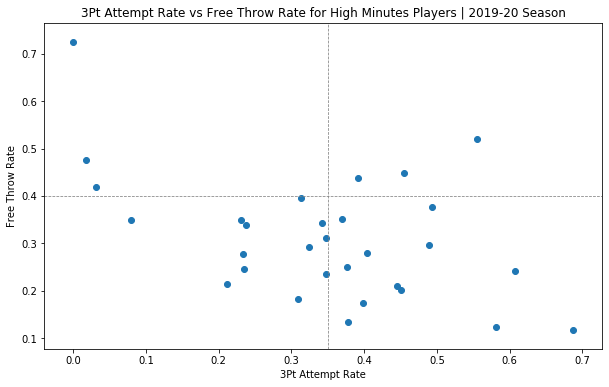

In [14]:
plt.figure(figsize=(10, 6))

plt.scatter(nba_shooting['3PAr'], nba_shooting['FTr'])
plt.axhline(0.4, linestyle='--', color='gray', linewidth=0.75)
plt.axvline(0.35, linestyle='--', color='gray', linewidth=0.75)

plt.xlabel('3Pt Attempt Rate')
plt.ylabel('Free Throw Rate')
plt.title('3Pt Attempt Rate vs Free Throw Rate for High Minutes Players | 2019-20 Season')
plt.show()

### There's two directions we can take this. The first is to annotate all the players in the "Moreyball Zone," and the other is to just highlight Rockets players. Let's look at both.

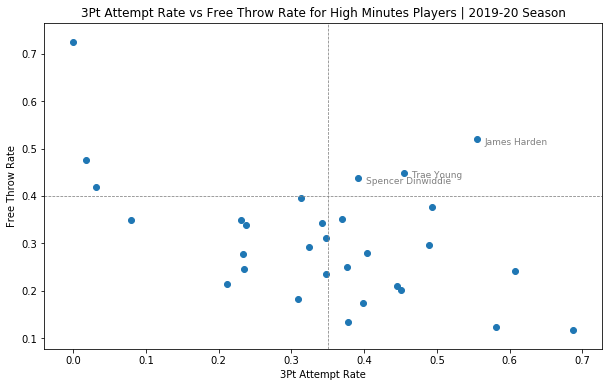

In [27]:
plt.figure(figsize=(10, 6))

plt.scatter(nba_shooting['3PAr'], nba_shooting['FTr'])
plt.axhline(0.4, linestyle='--', color='gray', linewidth=0.75)
plt.axvline(0.35, linestyle='--', color='gray', linewidth=0.75)

# Let's automatically look through our dataframe to figure out who to annotate..
# We'll offset the 3PAr and FTr so that our annotations appear beside the data points of interest
notes = nba_shooting[(nba_shooting['3PAr'] > 0.35) & (nba_shooting['FTr'] > 0.4)][['player', '3PAr', 'FTr']]
for index, row in notes.iterrows():
    plt.text(row['3PAr'] + 0.01, row['FTr'] - 0.01, row['player'], fontsize=9, color='gray')

plt.xlabel('3Pt Attempt Rate')
plt.ylabel('Free Throw Rate')
plt.title('3Pt Attempt Rate vs Free Throw Rate for High Minutes Players | 2019-20 Season')
plt.show()

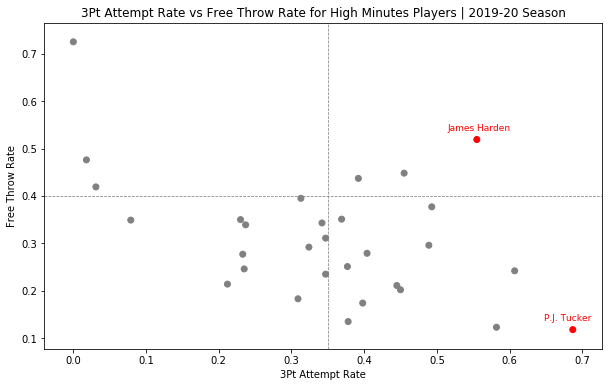

In [33]:
plt.figure(figsize=(10, 6))

# In order to specify colors, we'll need to create a column of data that stores reference colors for each point
# Since we want to highlight just Rockets players in our data (James Harden and PJ Tucker), 
# Let's set those 2 to red and everyone else to gray
# Then we can use the color parameter in our scatter plot function to call this column
nba_shooting['color'] = np.where(nba_shooting['player'].isin(['James Harden', 'P.J. Tucker']), 'red', 'gray')
plt.scatter(nba_shooting['3PAr'], nba_shooting['FTr'], color=nba_shooting['color'])

# We're also going to throw in annotations on each player's name
notes = nba_shooting[nba_shooting['player'].isin(['James Harden', 'P.J. Tucker'])][['player', '3PAr', 'FTr']]
for index, row in notes.iterrows():
    plt.text(row['3PAr'] - 0.04, row['FTr'] + 0.02, row['player'], fontsize=9, color='red')

plt.axhline(0.4, linestyle='--', color='gray', linewidth=0.75)
plt.axvline(0.35, linestyle='--', color='gray', linewidth=0.75)

plt.xlabel('3Pt Attempt Rate')
plt.ylabel('Free Throw Rate')
plt.title('3Pt Attempt Rate vs Free Throw Rate for High Minutes Players | 2019-20 Season')
plt.show()

## B) Our dataset contains more than just simple 2D relationships, however. We can glean even more information if we size each point by a third dimension, like points per 36 minutes.

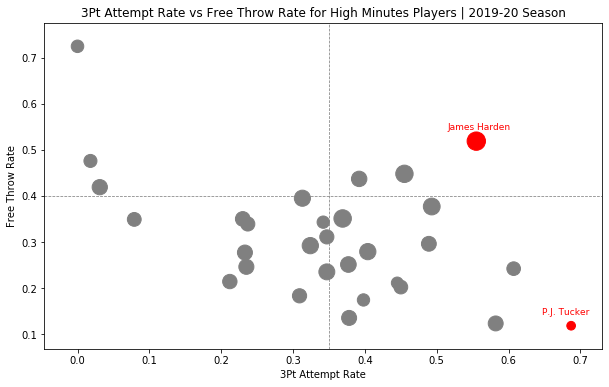

In [40]:
plt.figure(figsize=(10, 6))

nba_shooting['color'] = np.where(nba_shooting['player'].isin(['James Harden', 'P.J. Tucker']), 'red', 'gray')

# We're gonna follow up on the same exercise as before, where we highlight the Rockets players. 
# This time we're gonna use the 's' parameter (for size) in scatter plots to size each point by the points column.
# To scale up the actual column data so it's prominent in the graph, we'll just adjust by a factor of x10. 
plt.scatter(nba_shooting['3PAr'], nba_shooting['FTr'], color=nba_shooting['color'], s=nba_shooting['pts']*10)

plt.axhline(0.4, linestyle='--', color='gray', linewidth=0.75)
plt.axvline(0.35, linestyle='--', color='gray', linewidth=0.75)

notes = nba_shooting[nba_shooting['player'].isin(['James Harden', 'P.J. Tucker'])][['player', '3PAr', 'FTr']]
for index, row in notes.iterrows():
    plt.text(row['3PAr'] - 0.04, row['FTr'] + 0.025, row['player'], fontsize=9, color='red')

plt.xlabel('3Pt Attempt Rate')
plt.ylabel('Free Throw Rate')
plt.title('3Pt Attempt Rate vs Free Throw Rate for High Minutes Players | 2019-20 Season')
plt.show()

## C) Capturing a More Dense System - Devin Booker's Shot Attempts

### What happens if we just use another scatter plot?

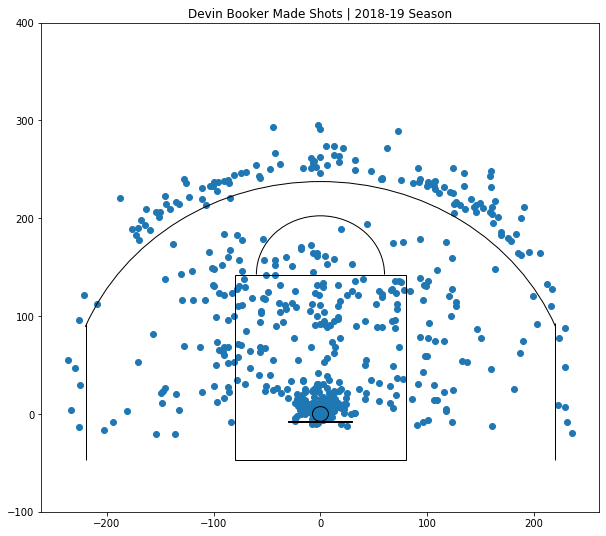

In [49]:
plt.figure(figsize=(10, 9))

# In order to guide this plot a little better, we're going to draw a basic court onto our graph
# This is cribbed shamelessly and with great appreciation from Savvas Tjortjoglou's great NBA shot data tutorial

# plt.gca() stands for "get current axis"... Since we didn't specify an axis when starting, 
# we need one to draw our court elements onto
ax = plt.gca()

# Everything here is just basic shapes, anchored onto our court coordinates
hoop = Circle((0, 0), radius=7.5, linewidth=1, color='black', fill=False)
backboard = Rectangle((-30, -7.5), 60, -1, linewidth=1, color='black')
outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=1, color='black', fill=False)
top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180, linewidth=1, color='black', fill=False)
corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=1, color='black')
corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=1, color='black')
three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=1, color='black')

# Now that our shapes specs are entered, we just call the add_patch method to actually draw them
for element in [hoop, backboard, outer_box, top_free_throw, corner_three_a, corner_three_b, three_arc]:
    ax.add_patch(element)

plt.scatter(dbook['original_x'], dbook['original_y'])
plt.ylim(-100, 400)

plt.title('Devin Booker Made Shots | 2018-19 Season')
plt.show()

### So now we can see where all the shots came from. However, sometimes with spatial or dense 2D systems, we can glean even more info by binning our data.

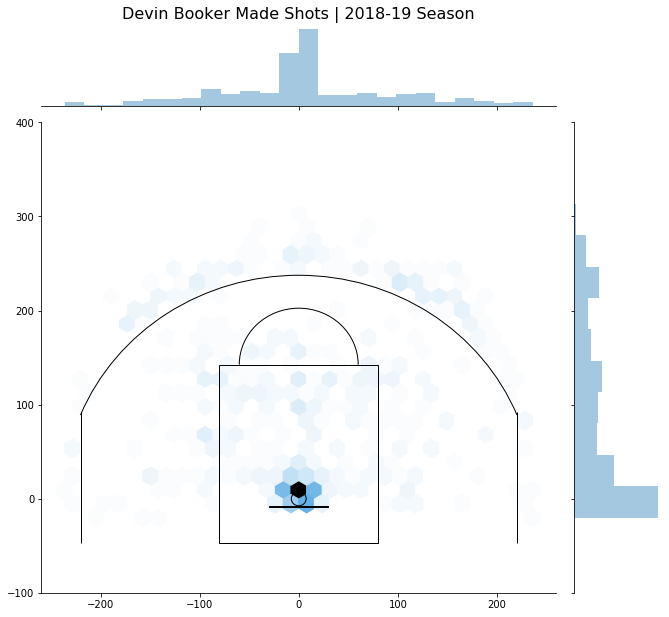

In [76]:
# Seaborn provides a great option for visualizing binned data. 
# Seaborn is built on top of matplotlib, so you'll recognize many of the same axis functions we've used before
# We'll first call upon the joinplot function and specify that we want to apply a "hex" binning pattern to our data
# Depending on your data, play with the gridsize argument to refine the size of your bins (bigger = more granular)
figure = sns.jointplot("original_x", "original_y", data=dbook, kind="hex", joint_kws=dict(gridsize=30))

# In a seaborn join plot, there are three axis objects (one for the main plot, and two for the marginal distributions)
# Let's call the main plot's axis first, and draw our rudimentary court
ax = figure.ax_joint

hoop = Circle((0, 0), radius=7.5, linewidth=1, color='black', fill=False)
backboard = Rectangle((-30, -7.5), 60, -1, linewidth=1, color='black')
outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=1, color='black', fill=False)
top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180, linewidth=1, color='black', fill=False)
corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=1, color='black')
corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=1, color='black')
three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=1, color='black')

for element in [hoop, backboard, outer_box, top_free_throw, corner_three_a, corner_three_b, three_arc]:
    ax.add_patch(element)

# We can set the size of our plot by calling the set_size_inches function for the fig class in our jointplot object
figure.fig.set_size_inches(10, 9)

# You might recognize these basic functions for cleaning up the plot
ax.set_ylim(-100, 400)
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off')

# Since there are multiple axes objects, in order to set the title for our figure, 
# we'll set it on top of the marginal X distribution's Axis
figure.ax_marg_x.set_title('Devin Booker Made Shots | 2018-19 Season', fontsize=16)

plt.show()

# 2. Visualizing Trends: Ready for Takeoff

## A) Line graphs can show trends in airline traffic over time, feels pretty simple.

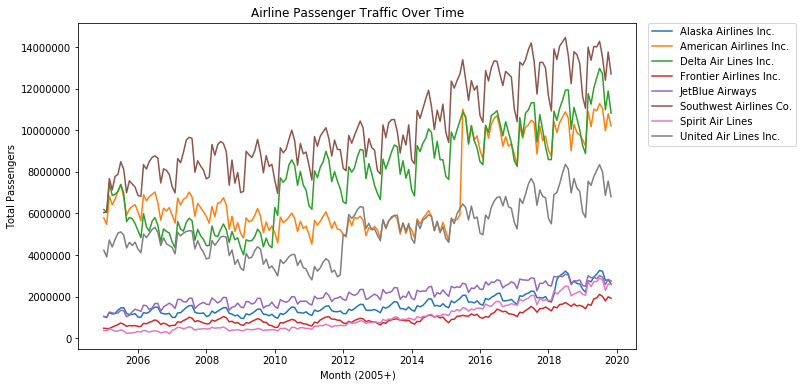

In [146]:
plt.figure(figsize=(10, 6))

for i in airlines['UNIQUE_CARRIER_NAME'].unique():
    plt.plot(airlines[airlines['UNIQUE_CARRIER_NAME'] == i]['DATE_JOIN'], 
             airlines[airlines['UNIQUE_CARRIER_NAME'] == i]['PASSENGERS'], label=i)

# We have really large numbers (like ~15 million big), so let's turn off scientific notation below
plt.ticklabel_format(axis = 'y', style='plain')

plt.legend(bbox_to_anchor=(1.02, 1), borderaxespad=0., loc='upper left')
plt.xlabel('Month (2005+)')
plt.ylabel('Total Passengers')
plt.title('Airline Passenger Traffic Over Time')

plt.show()

## B) There's clear seasonality and some big level shifts. How about trading off some of the precision to show the relative share levels between the airlines with a stacked bar chart?

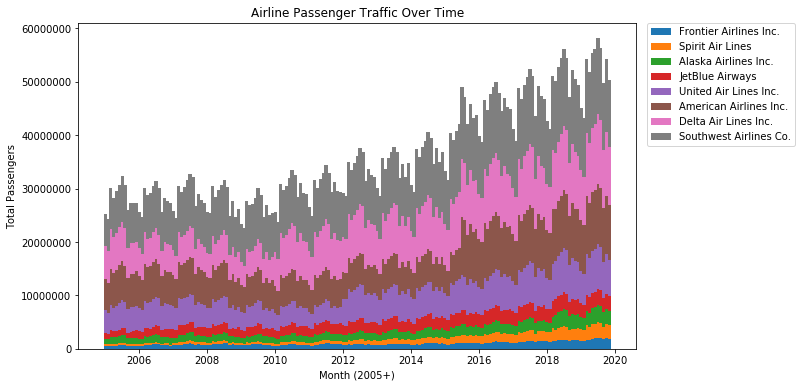

In [147]:
# So a stacked bar graph is kinda weird in Python. What we'll do is iteratively draw bar graphs 
# and reset the "bottom" of the new set of bars on each iteration.
plt.figure(figsize=(10, 6))

# It's better for us to order the stacking of bars by rank order of airline traffic, 
# so let's create a listing where we order the airlines by final rank as seen in the above graph
carriers = airlines[airlines['DATE_JOIN'] == 
                    max(airlines['DATE_JOIN'])].sort_values(by='PASSENGERS')['UNIQUE_CARRIER_NAME'].values

# Let's initialize our first set of bars (by rank as seen above, Frontier Airlines)
plt.bar(airlines[airlines['UNIQUE_CARRIER_NAME'] == carriers[0]]['DATE_JOIN'], 
        airlines[airlines['UNIQUE_CARRIER_NAME'] == i]['PASSENGERS'], width=35, label=carriers[0])

# The previous_c list will hold the previous classes that we iterate through
prev_c = [carriers[0]]
for i in carriers[1:]:
    # 'bots' sums up the total records across all the airlines that we've iterated through 
    # (it'll hold the new cumulative "bottom" for each set)
    bots = airlines[airlines['UNIQUE_CARRIER_NAME'].isin(prev_c)].groupby(['DATE_JOIN'], 
                                                                          sort=False).agg({'PASSENGERS': 
                                                                                           'sum'}).reset_index()
    prev_c.append(i)

    # Then in plotting the new set of bars, set the bottom parameter to the summation we just did above
    plt.bar(airlines[airlines['UNIQUE_CARRIER_NAME'] == i]['DATE_JOIN'], 
            airlines[airlines['UNIQUE_CARRIER_NAME'] == i]['PASSENGERS'], 
            bottom = bots['PASSENGERS'], width=35, label=i)

        
plt.ticklabel_format(axis = 'y', style='plain')

plt.legend(bbox_to_anchor=(1.02, 1), borderaxespad=0., loc='upper left')
plt.xlabel('Month (2005+)')
plt.ylabel('Total Passengers')
plt.title('Airline Passenger Traffic Over Time')

plt.show()

## C) Let's go for maximum impact and try a heatmap.

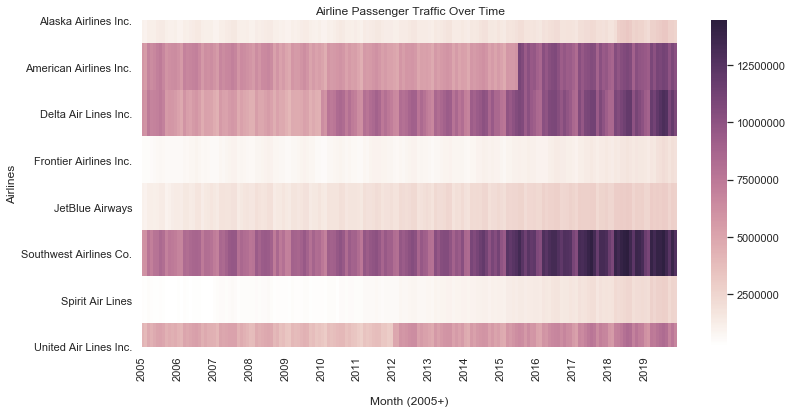

In [180]:
# In order to use the seaborn heatmap, we must convert the dataframe first into a pivot table object
airlines_pv = airlines.pivot('UNIQUE_CARRIER_NAME', 'DATE_JOIN', 'PASSENGERS')

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(1, 1, 1)

# This colormap will create a gradient from light to dark, allowing us to perceive less traffic as white space
# See documentation here for Seaborn color palettes... https://seaborn.pydata.org/tutorial/color_palettes.html
cmap = sns.cubehelix_palette(light=1, as_cmap=True)

# We can initialize a simply heatmap with our pivot table and specify the color map as well as axis to plot on
# See Seaborn heatmap docs here... https://seaborn.pydata.org/generated/seaborn.heatmap.html
# We'll also turn off scientific notation for our colorbar
formatter = tkr.ScalarFormatter()
formatter.set_scientific(False)
sns.heatmap(airlines_pv, cmap=cmap, ax=ax1, cbar_kws={'format': formatter})

# Since the X-Axis is in a timestamp format, we can overwrite it with a custom set of labels for better readability
ax1.set_xticks(np.arange(0, len(airlines[airlines['UNIQUE_CARRIER_NAME'] == 'Southwest Airlines Co.']), 12))
ax1.set_xticklabels(list(airlines['YEAR'].unique()))

ax1.xaxis.set_ticks_position('none')
ax1.yaxis.set_ticks_position('none')

# We can use the labelpad parameter if we find that our label is too close to our tick labels
plt.xlabel('Month (2005+)', labelpad=15)
plt.ylabel('Airlines')
plt.title('Airline Passenger Traffic Over Time')
plt.show()

# 3. Visualizing Distributions: Getting Hotter

## A) Let's explore the overall distribution of daily temperature highs for Chicago in 2019 with a simple histogram

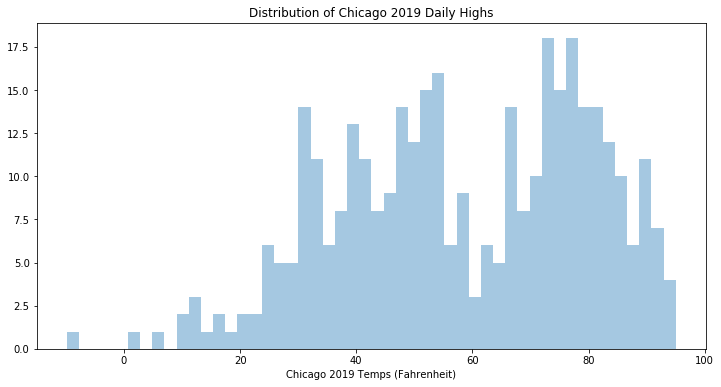

In [157]:
# We'll call on Seaborn again, using the distplot function, with the other frills turned off
# The KDE is a kernel density estimation, an overall curve fit to the shape of our data (remember this for later)
# The rug is a set of ticks at the bottom demarcating each data point

fig = plt.figure(figsize=(12, 6))

# Play around with the bins parameter to get the best view of your data
sns.distplot(chicago_temps[chicago_temps['year'] == 2019]['tmax'], bins=50, kde=False, rug=False)

plt.xlabel('Chicago 2019 Temps (Fahrenheit)')
plt.title('Distribution of Chicago 2019 Daily Highs')
plt.show()

## B) Let's dig another level down and capture the summary stats for each month in 2019 with a box and whisker plot

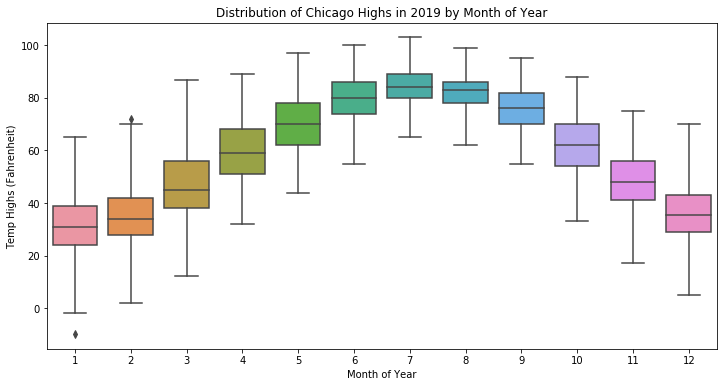

In [6]:
# Seaborn has a built in boxplot function as well that's extremely straightforward
# https://seaborn.pydata.org/generated/seaborn.boxplot.html
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(1, 1, 1)

# The whis parameter lets us set the limits of the interquartile range in our box plot
sns.boxplot(x="month", y="tmax", data=chicago_temps, whis=2, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)

plt.title('Distribution of Chicago Highs in 2019 by Month of Year')
plt.xlabel('Month of Year')
plt.ylabel('Temp Highs (Fahrenheit)')
plt.show()

## C) Let's evolve to a more detailed view of the temperatures distribution with a ridge plot

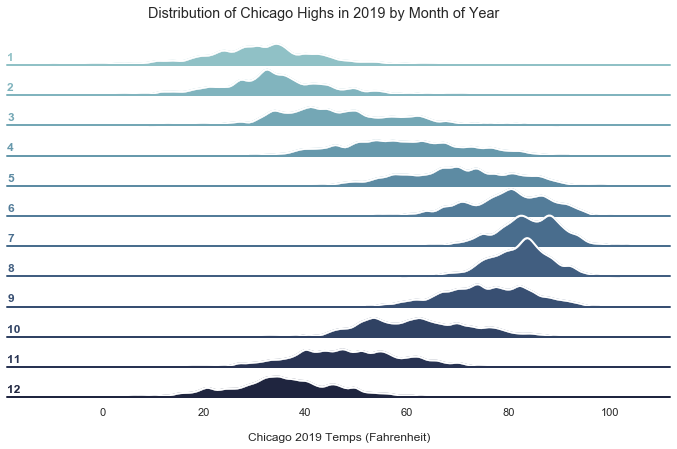

In [179]:
# Seaborn documentation provides a great setup for using KDE curve plots as the basis for creating ridge plots
# Cribbed shameless and with great appreciation from https://seaborn.pydata.org/examples/kde_ridgeplot
# In a later notebook, we'll explore how to manipulate this in more depth, but for now the basics...

# We'll first set the template background for our ridge plot
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Initialize the color palette we're going to use, with as many elements as we have categories (months, in this case)
pal = sns.cubehelix_palette(12, rot=-0.25, light=0.7)

# Initialize the Facetgrid object (a facet grid is a repeated modular grid of similarly styled graphs)
g = sns.FacetGrid(chicago_temps, row="month", hue="month", aspect=20, height=0.5, palette=pal)

# Draw the densities in a few steps
# The bw parameter controls the bandwidth (in other words, granularity) of our KDE curves; bigger = less granular
g.map(sns.kdeplot, "tmax", clip_on=False, shade=True, alpha=1, lw=1.5, bw=1)
g.map(sns.kdeplot, "tmax", clip_on=False, color="w", lw=2, bw=1)
g.map(plt.axhline, y=0, lw=2, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, 0.2, label, fontweight="bold", color=color, ha="left", va="center", transform=ax.transAxes)
    
g.map(label, "tmax")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-0.25)

# Remove the axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

plt.xlabel('Chicago 2019 Temps (Fahrenheit)', labelpad=15)

# Suptitle allows us to set an overarching title for our figure when we have multiple graphs
plt.suptitle('Distribution of Chicago Highs in 2019 by Month of Year')
plt.show()